In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# 로이터 뉴스 데이터에 대해 분류
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)


- num_words : 정수로 설정하거나 따로 설정 안 해도 됨. 정수로 설정하면 빈도수가 가장 높은 단어(훈련 세트에서) 순서로 정수 개수만큼 저장. 개수 넘어가는 단어들은 oov_char로 저장됨
- skip_top : 지정한 개수만큼 건너뜀(5개면 제일 빈도수 높은 상위 5개는 건너뜀). 건너뛴 단어는 oov_char로 저장됨. 아마 불용어 제거할 때 사용할 것 같음
- max_len : 최대 문장 길이
- test_split : 시험 데이터로 사용할 비율
- start_char : 문장 시작 단어 지정. 기본값은 1. 0은 보통 패딩 된 부분을 표현하기 때문임
- oov_char : num_words, skip_top 설정으로 oov_char로 저장된 단어들을 표현할 숫자. 기본값 2

In [2]:
print(x_train[0])
print(x_test[0])


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [3]:
x_train, y_train

(array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
        list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
        list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 1

In [4]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))


클래스의 수 : 46


max train data len : 2376
average train data len : 145.5398574927633


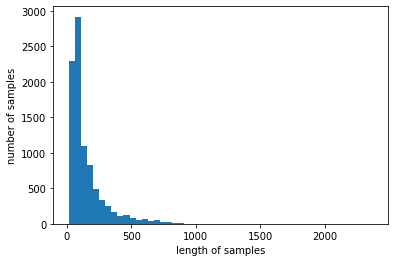

In [5]:
print(f'max train data len : {max(len(l) for l in x_train)}')
print(f'average train data len : {sum(map(len, x_train))/len(x_train)}')

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

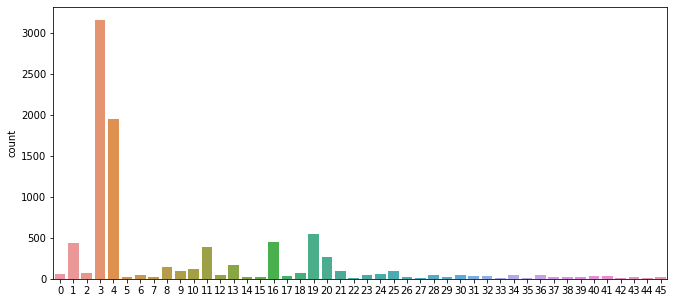

In [6]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [7]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 클래스 빈도수 : ')
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수 : 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [8]:
# 정수화되어 있는 데이터를 단어로 변경
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
  
# 확인
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [9]:
decoded_train = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded_train.append(t)

x_train = decoded_train

decoded_test = []
for i in range(len(x_test)):
  text = ' '.join([index_to_word[index] for index in x_test[i]])
  decoded_test.append(text)

x_test = decoded_test


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 1 : DTM 생성
"""
CountVectorizer
: 단어들의 카운트(출현 빈도(frequency))로 여러 문서들을 벡터화
카운트 행렬, 단어 문서 행렬 (Term-Document Matrix, TDM))
모두 소문자로 변환시키기 때문에 me 와 Me 는 모두 같은 특성이 된다.
"""
dtmvector = CountVectorizer()
# dtmvector.vocabulary_
# dtmvector.stop_words_
# dtmvector.get_feature_names()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# output
(8982, 9670)

# 2 : Tfidf 행렬 생성
tfidf_matrix = TfidfTransformer()
x_train_tfidf = tfidf_matrix.fit_transform(x_train_dtm)
# tfidf_matrix.idf_
# x_train_dtm.toarray().shape

print(a.shape)


(8982, 9670)
(8982, 9670)


In [42]:
len(x_train[0])

401

In [40]:
x_train_tfidf.toarray()[0].shape

(9670,)

In [11]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [12]:
x_test_dtm = dtmvector.transform(x_test)
x_test_tfidf = tfidf_matrix.transform(x_test_dtm)


model_NB = MultinomialNB()
model_NB.fit(x_train_tfidf, y_train)

predicted_NB = model_NB.predict(x_test_tfidf)
print('정확도 : ', accuracy_score(y_test, predicted_NB))


정확도 :  0.6567230632235085


In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, model_NB.predict(x_test_tfidf), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

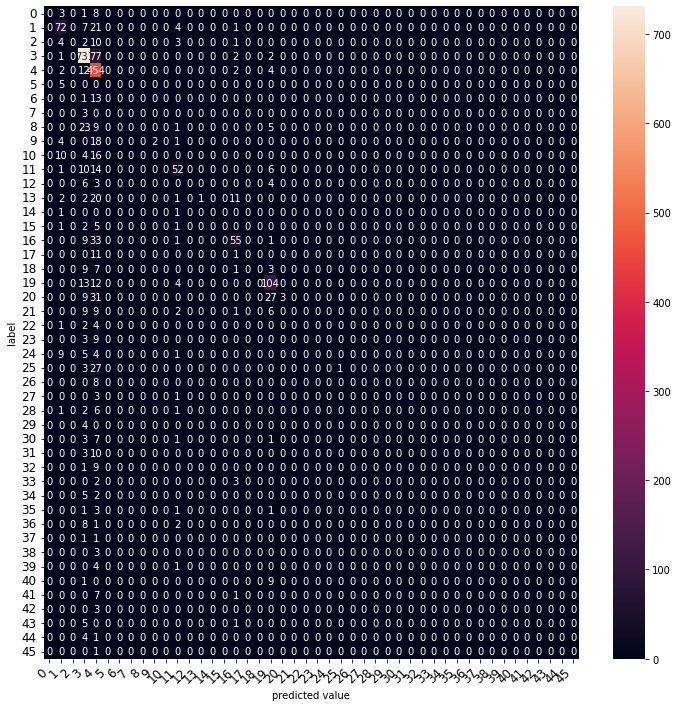

In [14]:
def graph_confusion_matrix(model, x_test, y_test):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt='d')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')


graph_confusion_matrix(model_NB, x_test_tfidf, y_test)

In [16]:
# Completement Naive Bayes Classifier (CNB)
# 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 보유
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)

predicted = cb.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.7707034728406055


In [17]:
# Logistic Regression
# softmax 함수를 사용한 다중 클래스 분류 알고리즘을 지원함
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)

predicted = lr.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.8103294746215495


In [18]:
# Linear Support Vector Machine
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)

predicted = lsvc.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.784060552092609


c:\Users\balin\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10, random_state=27)
tree.fit(x_train_tfidf, y_train)

predicted = tree.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.6228851291184327


In [20]:
# Random Forest
forest = RandomForestClassifier(n_estimators = 5, random_state=27)
forest.fit(x_train_tfidf, y_train)

predicted = forest.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.6674087266251113
